<a href="https://colab.research.google.com/github/inunes1904/DeepLearning/blob/main/FruitClassificationCNN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

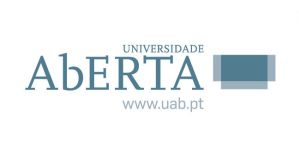

## Universidade Aberta
# Unidade Curricular: Deep Learning
Docentes: António Cunha, Paulo Pombinho e Pedro Mestre
# Trabalho de Grupo - Parte 2
Realizado por: André Costa (Nº 2302571) e
Ivo Nunes (Nº 2302582)

---

## Secção 1: Configuração e Carregamento dos Dados

### Verifica a presença e o estado da GPU.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Descompacta, em modo "silent", o arquivo ".zip".

In [ ]:
!unzip -q "archive.zip"

replace archive/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/archive/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Importação das bibliotecas necessárias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Define uma semente aleatória para o TensorFlow
tf.random.set_seed(4)

### Definição do caminho para os dados de treino e de teste

In [ ]:
train_path = Path("archive/train")
test_path = Path("archive/test")

### Obtenção do "path" das imagens utilizadas no treino

In [ ]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['archive/train/banana/banana_31.jpg',
 'archive/train/banana/banana_11.jpg',
 'archive/train/banana/banana_58.jpg',
 'archive/train/banana/banana_33.jpg',
 'archive/train/banana/banana_50.jpg',
 'archive/train/banana/banana_57.jpg',
 'archive/train/banana/banana_28.jpg',
 'archive/train/banana/banana_4.jpg',
 'archive/train/banana/banana_53.jpg',
 'archive/train/banana/banana_3.jpg']

Após receber as labels das imagens, a função irá efetuar um split à string e, posteriormente, irá utilizar a palavra como label, tal como demonstrado acima no comentário da banana:

'archive' = 0 ;
'train' = 1 ;
'banana' = 2 ;
'banana_31.jpg' = 3

In [ ]:
# Criação das labels para as imagens utilizadas no treino
def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana']

In [ ]:
train_image_paths[:10]

['archive/train/banana/banana_31.jpg',
 'archive/train/banana/banana_11.jpg',
 'archive/train/banana/banana_58.jpg',
 'archive/train/banana/banana_33.jpg',
 'archive/train/banana/banana_50.jpg',
 'archive/train/banana/banana_57.jpg',
 'archive/train/banana/banana_28.jpg',
 'archive/train/banana/banana_4.jpg',
 'archive/train/banana/banana_53.jpg',
 'archive/train/banana/banana_3.jpg']

In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

### Divisão dos dados de treino, em conjuntos, e posterior validação.

É efetuada uma divisão dos "paths" das imagens, e respetivas labels, nos conjuntos de treino e de validação. Os resultados são atribuídos às variáveis 'Train_paths', 'Val_paths', 'Train_labels' e 'Val_labels'.

In [ ]:
# Importação da biblioteca necessária
from sklearn.model_selection import train_test_split

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

Obtenção dos primeiros 10 elementos das listas 'Train_paths' e 'Train_labels'.

In [ ]:
Train_paths[:10] , Train_labels[:10]

(['archive/train/apple/apple_30.jpg',
  'archive/train/orange/orange_42.jpg',
  'archive/train/banana/banana_10.jpg',
  'archive/train/banana/banana_11.jpg',
  'archive/train/banana/banana_56.jpg',
  'archive/train/apple/apple_63.jpg',
  'archive/train/mixed/mixed_6.jpg',
  'archive/train/mixed/mixed_10.jpg',
  'archive/train/orange/orange_50.jpg',
  'archive/train/mixed/mixed_2.jpg'],
 array([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.]], dtype=float32))

---

## Secção 2: Pré-Processamento dos Dados

A função 'load' recebe dois parâmetros ('image' e 'label').
A função carrega uma imagem, a partir do caminho fornecido em 'image' e realiza a descodificação, no formato ".jpeg", utilizando a biblioteca TensorFlow.

In [ ]:
# Função utilizada para a transformação da imagem
def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

Definição de sequências de pré-processamento de dados, para redimensionar as imagens e aplicar incrementos de dados.

In [ ]:
# Definição do tamanho da imagem e do tamanho do grupo/batch
IMG_SIZE = 224
BATCH_SIZE = 32

# Efetuado o redimensionamento de todas as imagens, para o tamanho definido em 'IMG_SIZE'
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

# Definição de sequência, com 3 camadas de aumento de dados
data_augmentation = tf.keras.Sequential([
    # Espelhamento horizontal aleatório das imagens
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # Adicionada uma rotação aleatória às imagens, no intervalo definido
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # Aplicação de um zoom aleatório à altura das imagens, no intervalo definido
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

Otimização do desempenho do carregamento dos dados, permitindo que o TensorFlow ajuste, de forma dinâmica, a capacidade de pré-busca dos dados.

In [ ]:
# Importação da constante 'AUTOTUNE', da biblioteca 'TensorFlow', permitindo que haja um ajuste dinâmico na utilização de recursos
AUTOTUNE = tf.data.experimental.AUTOTUNE
# Definição da função 'get_dataset'
def get_dataset(paths , labels , train = True):
    # Conversão dos "paths" das imagens e das "labels" em tensores 'TensorFlow'
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    # Criação de datasets, a partir dos tensores
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    # Efetuada a combinação dos datasets das imagens e das labels
    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    # Aplicação da função 'load' a cada par "imagem-label" no dataset
    dataset = dataset.map(lambda image , label : load(image , label))
    # Redimensionamento das imagens, no dataset, e paralelização do carregamento
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    # Efetuado um 'shuffle' aos elementos do dataset, de forma aleatória
    dataset = dataset.shuffle(1000)
    # Agrupamento dos elementos do dataset, em lotes de tamanho 'BATCH_SIZE'
    dataset = dataset.batch(BATCH_SIZE)

    # Caso seja efetuado o treino, aplicar a função de aumento dos dados ao dataset
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
    # Repetir o dataset indefinidamente
    dataset = dataset.repeat()
    # Retornar o dataset final
    return dataset

O conjunto de dados de treino é carregado, com os caminhos e labels correspondentes, sendo o tempo de execução exibido.

In [ ]:
# Medição do tempo de execução da criação do conjunto de dados de treino
%time train_dataset = get_dataset(Train_paths , Train_labels)

# Obtenção do próximo elemento do conjunto de dados, utilizando um iterador
image , label = next(iter(train_dataset))
# Exibição do formato ('shape') da imagem
print(image.shape)
# Exibição do formato ('shape') da label
print(label.shape)

CPU times: user 1.05 s, sys: 14.8 ms, total: 1.06 s
Wall time: 1.3 s
(32, 224, 224, 3)
(32, 4)


Face aos resultados obtidos, podemos concluir que o código demora pouco mais que 1 segundo (1,3) para criar o conjunto de dados de treino.

A imagem tem um formato de tensor 4D, indicando um lote de 32 imagens, cada uma com dimensões de 224x224 pixels e 3 canais de cor (RGB).

A label tem um formato de tensor 2D, indicando um lote de 32 labels, cada uma com 4 elementos. Isso sugere que cada label pode ter 4 categorias ou valores.

### Visualização de um exemplo de uma amostra de imagem de treino

banana


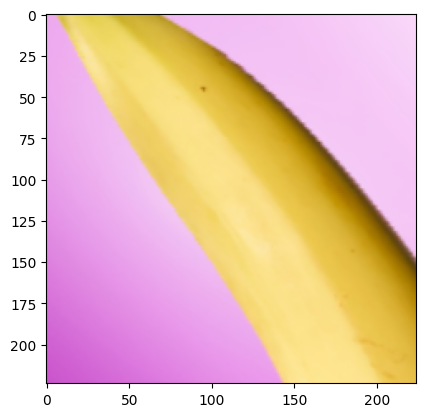

In [ ]:
# Exibição da label prevista, utilizando o método 'inverse_transform' do objeto 'LabelEncoder' (Le)
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
# Exibição da imagem, utilizando o 'Matplotlib, após normalizar os valores de pixel para o intervalo (0,1)
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

O conjunto de dados de validação é carregado, com os caminhos e labels correspondentes, sendo o tempo de execução exibido.

In [ ]:
# Medição do tempo de execução para a criação do conjunto de dados de validação
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

# Obtenção do próximo elemento do conjunto de dados de validação, utilizando um iterador
image , label = next(iter(val_dataset))
# Exibição do formato ('shape') da imagem
print(image.shape)
# Exibição do formato ('shape') da label
print(label.shape)

CPU times: user 50.4 ms, sys: 927 µs, total: 51.3 ms
Wall time: 127 ms
(32, 224, 224, 3)
(32, 4)


Face aos resultados obtidos, podemos concluir que o código demora 127 milisegundos para criar o conjunto de dados de validação.

A imagem tem um formato de tensor 4D, indicando um lote de 32 imagens, cada uma com dimensões de 224x224 pixels e 3 canais de cor (RGB).

A label tem um formato de tensor 2D, indicando um lote de 32 labels, cada uma com 4 elementos. Isso sugere que cada label pode ter 4 categorias ou valores.

### Visualização de um exemplo de uma amostra de imagem de validação

banana


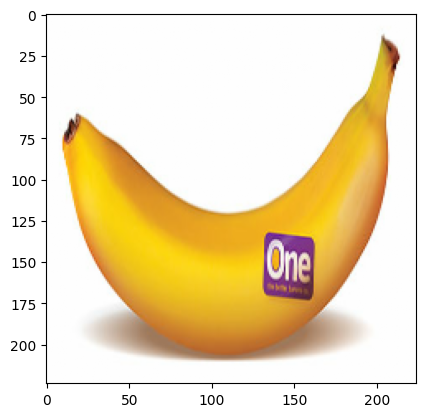

In [ ]:
# Exibição da label prevista, utilizando o método 'inverse_transform' do objeto 'LabelEncoder' (Le)
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
# Exibição da imagem, utilizando o 'Matplotlib, após normalizar os valores de pixel para o intervalo (0,1)
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

---

## Secção 3: Definição do Modelo e Treino

### Criação do modelo ResNet50

In [ ]:
# Importação da arquitetura 'EfficientNetB3', da biblioteca 'keras.applications'
from tensorflow.keras.applications import EfficientNetB3

# Criação de uma instância do modelo 'EfficientNetB3', com entrada de forma (224, 224, 3), e sem camada, totalmente conectada no topo
backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False
)

# Criação de um modelo sequencial no 'TensorFlow'
model = tf.keras.Sequential([
    # Adicionada uma espinha dorsal 'EfficientNetB3' ao modelo sequencial
    backbone,
    # Adicionada uma camada de pooling global média, para reduzir as dimensões espaciais
    tf.keras.layers.GlobalAveragePooling2D(),
    # Adicionada uma camada de dropout, para regularização
    tf.keras.layers.Dropout(0.3),
    # Adicionada uma camada totalmente conectada (dense), com 4 unidades e ativação 'softmax' para a classificação
    tf.keras.layers.Dense(4, activation='softmax')
])

# Exibição de um resumo do modelo, incluíndo a arquitetura e o número de parâmetros
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 4)                 6148      
                                                                 
Total params: 10789683 (41.16 MB)
Trainable params: 10702380 (40.83 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________


O modelo criado é uma rede neuronal sequencial, que utiliza a arquitetura 'EfficientNetB3' como espinha dorsal.

É composta por mais de 10.7 milhões de parâmetros. A rede é capaz de extrair características complexas das imagens de entrada (224x224 pixels com 3 canais de cor).

A camada de pooling global média reduz as dimensões espaciais para um vetor de 1536 elementos, seguido por uma camada de dropout para regularização.

A camada totalmente conectada com ativação 'softmax', realiza a classificação em quatro categorias.

O modelo apresenta aproximadamente 41.16 MB de tamanho total, sendo a maioria desses parâmetros susceptíveis ao treino (40.83 MB), enquanto que uma pequena porção não é susceptível (341.03 KB), indicando a presença de parâmetros fixos da camada 'EfficientNetB3' pré-treinada.

### Compilação do modelo, fornecendo o Otimizador, a Perda e as Métricas

In [ ]:
# Compilação do modelo com o otimizador 'Adam', função de perda 'categorical_crossentropy' e métricas de 'accuracy', 'precision' e 'recall'
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
# Exibição de um resumo do modelo compilado
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 4)                 6148      
                                                                 
Total params: 10789683 (41.16 MB)
Trainable params: 10702380 (40.83 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________


O modelo sequencial contém uma arquitetura robusta, com uma espinha dorsal 'EfficientNetB3', com um total de mais de 10.7 milhões de parâmetros.

A camada de pooling global média reduz as dimensões espaciais para um vetor de 1536 elementos, seguido por um dropout para regularização.

A camada totalmente conectada realiza a classificação em quatro categorias.

O modelo, compilado com o otimizador 'Adam' e a função de perda 'categorical crossentropy', destaca-se pela sua complexidade, com a maioria dos parâmetros susceptíveis ao treino.

Os dados apresentados fornecem uma visão abrangente da estrutura e dos recursos envolvidos, sendo os mesmos relevantes para os ajustes e para a avaliação do desempenho, durante o treino.

### Treino do modelo - Fase 1

In [ ]:
# Efetuado o treino ao modelo, utilizando o conjunto de treino, e validando-o, utilizando o conjunto de validação
history = model.fit(
    # Conjunto de treino
    train_dataset,
    # Número de passos, por época
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    # Número total de épocas
    epochs=1,
    # Conjunto de validação
    validation_data=val_dataset,
    # Número de passos de validação, por época
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

5/5 [==============================] - 145s 20s/step - loss: 0.7588 - accuracy: 0.7312 - precision: 0.8958 - recall: 0.5375 - val_loss: 0.5113 - val_accuracy: 0.8750 - val_precision: 0.9000 - val_recall: 0.8438


Após uma única época de treino, o modelo atingiu resultados bastante positivos.

Durante o treino, a perda média foi de 0.7588, com uma precisão de aproximadamente 73.12%, uma precisão positiva de 89.58%, e uma revocação de 53.75%.

Estes números indicam que o modelo conseguiu classificar corretamente uma percentagem substancial das amostras, embora com alguma compensação entre a precisão e a revocação.

Ao avaliarmos o desempenho no conjunto de validação, observamos uma perda média de 0.5113, uma 'accuracy' de 87.50%, uma precisão positiva de 90.00%, e uma revocação de 84.38%.

Estes resultados sugerem que o modelo generaliza bem para os novos dados, mantendo uma boa precisão e revocação no conjunto de validação.

Efetuado o acesso à primeira camada do modelo ('EfficientNetB3') e definida a propriedade 'trainable' da camada como 'False'. Isto significa que os parâmetros (pesos) desta camada não serão ajustados durante o treino.

In [ ]:
model.layers[0].trainable = False

### Definição dos Callbacks

A função 'ModelCheckpoint' guarda os melhores pesos durante o treino, enquanto que a função 'EarlyStopping' interrompe o treino, caso não haja melhorias após um número específico de épocas (patience).

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [ ]:
# Exibição de um resumo do modelo compilado
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 4)                 6148      
                                                                 
Total params: 10789683 (41.16 MB)
Trainable params: 6148 (24.02 KB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


Face aos dados apresentados, observa-se que a camada 'EfficientNetB3' contém um grande número de parâmetros (10.79 milhões), mas apenas 6148 destes são susceptíveis ao treino, enquanto os demais não, indicando que a espinha dorsal está congelada.

Esta configuração sugere que o modelo está a ser treinado para adaptar-se a uma tarefa específica, mantendo a base pré-treinada, e aproveitando os callbacks para monitorizar e guardar o melhor desempenho.

### Treino do modelo - Fase 2

Continuação do treino do modelo, por mais 10 épocas.
Os Callbacks são utilizados para guardar os melhores pesos e, potencialmente, interromper o treino de forma antecipada.

In [ ]:
# Efetua o treino ao modelo, utilizando o conjunto de treino e validando-o, utilizando o conjunto de validação, incorporando os callbacks
history = model.fit(
    # Conjunto de treino
    train_dataset,
    # Número de passos, por época
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    # Número total de épocas de treino
    epochs=10,
    # Callbacks para monitorização e aprimoramento do treino
    callbacks=[checkpoint , early_stop],
    # Conjunto de validação
    validation_data=val_dataset,
    # Número de passos de validação, por época
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.9750 - precision: 0.9808 - recall: 0.9563 
Epoch 1: val_loss improved from inf to 0.27242, saving model to best_weights.h5
5/5 [==============================] - 95s 18s/step - loss: 0.1429 - accuracy: 0.9750 - precision: 0.9808 - recall: 0.9563 - val_loss: 0.2724 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9865 - precision: 0.9865 - recall: 0.9865 
Epoch 2: val_loss did not improve from 0.27242
5/5 [==============================] - 86s 19s/step - loss: 0.0521 - accuracy: 0.9865 - precision: 0.9865 - recall: 0.9865 - val_loss: 0.7671 - val_accuracy: 0.7812 - val_precision: 0.7812 - val_recall: 0.7812
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9730 - precision: 0.9863 - recall: 0.9730 
Epoch 3: val_loss did not improve from 0.27242
5/5 [===========

Durante o treino do modelo, ao longo de 10 épocas, observamos evoluções relevantes nas métricas de desempenho.

Na primeira época, a perda no conjunto de treino foi baixa (0.1429), indicando uma boa adaptação aos dados. A 'accuracy' alcançou 97.50%, e tanto a precisão (98.08%) quanto a revocação (95.63%) demonstraram um equilíbrio favorável.

No entanto, ao avaliarmos o conjunto de validação, a perda foi um pouco mais elevada (0.2724), mas ainda assim razoável, com uma 'accuracy' de 87.50%.

O modelo continuou a treinar nas épocas subsequentes, apresentando variações nas métricas de treino e validação. De notar que, na quarta época, houve uma melhoria significativa na perda do conjunto de validação (0.1246), resultando numa 'accuracy' de 96.88%.

Este comportamento destaca a importância do callback 'ModelCheckpoint', que guardou os melhores pesos do modelo, e sugere que o modelo está-se a adaptar bem aos dados, embora possa ocorrer alguma flutuação ao longo das épocas.

O callback 'EarlyStopping' não foi ativado até à oitava época, indicando que o treino foi estável e sem sobre-ajuste até esse ponto.

Estes resultados fornecem uma visão detalhada do progresso do modelo, durante o treino, e da sua capacidade de generalização para novos dados.

---

## Secção 4: Avaliação dos Dados de Teste

In [ ]:
# Importação da arquitetura 'EfficientNetB3', da biblioteca 'keras.applications'
from tensorflow.keras.applications import EfficientNetB3

# Criação de uma instância do modelo 'EfficientNetB3', com entrada de forma (224, 224, 3), e sem camada, totalmente conectada no topo
backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False
)

# Criação de um modelo sequencial no 'TensorFlow'
model = tf.keras.Sequential([
     # Adicionada uma espinha dorsal 'EfficientNetB3' ao modelo sequencial
    backbone,
    # Adicionada uma camada de pooling global média, para reduzir as dimensões espaciais
    tf.keras.layers.GlobalAveragePooling2D(),
    # Adicionada uma camada de dropout, para regularização
    tf.keras.layers.Dropout(0.3),
    # Adicionada uma camada totalmente conectada (dense), com 4 unidades e ativação 'softmax' para a classificação
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compilação do modelo com o otimizador 'Adam', função de perda 'categorical_crossentropy' e métricas de 'accuracy', 'precision' e 'recall'
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

### Carregamento dos pesos pré-treinados

O argumento fornecido é o "path" para o arquivo que contém os pesos ('best_weights.h5').

In [ ]:
model.load_weights("best_weights.h5")

In [ ]:
# Obtenção dos "paths" das imagens de teste
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))
# Obtenção das labels das imagens de teste, utilizando a função 'get_label'
test_labels = list(map(lambda x : get_label(x) , test_image_paths))

# Conversão das labels, para a representação numérica, utilizando o 'LabelEncoder' (Le)
test_labels = Le.transform(test_labels)
# Conversão das labels, para representação "one-hot encoding"
test_labels = tf.keras.utils.to_categorical(test_labels)

# Conversão dos "paths" das imagens e das labels para tensores 'TensorFlow'
test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

# Função para descodificar as imagens
def decode_image(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    return image , label

# Criação de um conjunto de dados de teste, utilizando o "TensorFlow Dataset API"
test_dataset = (
     tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

### Exibição das informações sobre o lote de teste

In [ ]:
# Obtenção do próximo lote de imagens e labels do conjunto de dados de teste
image , label = next(iter(test_dataset))
# Exibição do formato ('shape') da imagem
print(image.shape)
# Exibição do formato ('shape') da label
print(label.shape)

(32, 224, 224, 3)
(32, 4)


Os resultados obtidos indicam as dimensões dos lotes de imagens e labels no conjunto de dados de teste.

O primeiro conjunto de números, (32, 224, 224, 3), representa o lote de imagens, onde 32 é o número de imagens no lote, 224 e 224 são as dimensões espaciais (altura e largura), e 3 é o número de canais de cor (RGB).

O segundo conjunto, (32, 4), representa o lote de labels, indicando que cada imagem tem uma representação "one-hot encoding" de 4 classes.

Estas dimensões são cruciais para garantir a compatibilidade entre o conjunto de dados de teste e a entrada do modelo, durante a avaliação, garantindo assim que as operações ocorram corretamente.

### Visualização da imagem de validação

banana


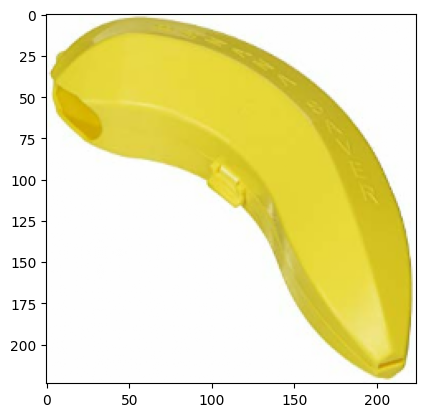

In [ ]:
# Exibição da label prevista, utilizando o método 'inverse_transform' do objeto 'LabelEncoder' (Le)
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
# Exibição da imagem, utilizando o 'Matplotlib, após normalizar os valores de pixel para o intervalo (0,1)
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

### Avaliação do modelo no conjunto de teste

In [ ]:
# Avaliação do modelo, no conjunto de dados de teste, e obtenção das métricas de perda, "accuracy", precisão e revocação
loss, acc, prec, rec = model.evaluate(test_dataset)

# Exibição da "accuracy" de teste, arredondada a duas casas decimais
print(f" Testing Acc : {round((acc*100),2)}%")
# Exibição da precisão de teste, arredondada a duas casas decimais
print(f" Testing Precision {round((prec*100),2)}%")
# Exibição da revocação de teste, arredondada a duas casas decimais
print(f" Testing Recall {round((rec*100),2)}%")

2/2 [==============================] - 7s 3s/step - loss: 0.7566 - accuracy: 0.8833 - precision: 0.8833 - recall: 0.8833
 Testing Acc : 88.33%
 Testing Precision 88.33%
 Testing Recall 88.33%


Os resultados obtidos da avaliação do modelo, no conjunto de dados de teste, indicam um desempenho sólido.

A métrica de perda ('loss') foi medida em 0.7566, refletindo o quão bem o modelo se ajusta aos dados de teste.

A 'accuracy' atingiu 88.33%, representando a proporção de predições corretas, em relação ao total de instâncias de teste.

Para além disso, tanto a precisão ('precision'), quanto a revocação ('recall'), também alcançaram 88.33%, indicando que o modelo é consistente na identificação e classificação das classes relevantes, no conjunto de dados de teste.

Estes resultados sugerem uma capacidade robusta do modelo em generalizar para os novos dados, e realizar classificações precisas e equilibradas.

---

## Secção 5: Previsão em Tempo Real

In [ ]:
# Carregamento e exibição de uma imagem
def LoadImage(image_path):
    # Leitura do "path" da imagem
    image = tf.io.read_file(image_path)
    # Descodificação da imagem, utilizando o formato ".jpeg" com 3 canais de côr (RGB)
    image = tf.io.decode_jpeg(image , channels = 3)
    # Redimensionamento da imagem, para as dimensões desejadas, utilizando o método bilinear
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    # Exibição da imagem, utilizando o 'Matplotlib'
    plt.imshow(image.numpy()/255)
    # Adicionada uma dimensão adicional para corresponder à entrada esperada do modelo
    image = tf.expand_dims(image , 0)
    return image

# Função para efetuar as previsões em tempo real
def RealtimePrediction(image_path , model, encoder_):
    # Carregamento da imagem, utilizando a função 'LoadImage'
    image = LoadImage(image_path)
    # Realização da previsão, utilizando o modelo
    prediction = model.predict(image)
    # Obtenção do índice da classe de previsão com maior probabilidade
    prediction = np.argmax(prediction , axis = 1)
    # Inversão da transformação aplicada anteriormente às labels, utilizando o objeto 'encoder_'
    return encoder_.inverse_transform(prediction)[0]

### Exemplo de uma previsão em tempo real

Para testar o modelo, foi solicitada uma previsão em tempo real ao mesmo, utilizando a imagem abaixo indicada ("Red_Apple.jpg"), e com recurso também ao 'LabelEncoder', para inverter a transformação aplicada às labels durante o treino do modelo.

1/1 [==============================] - 4s 4s/step


'apple'

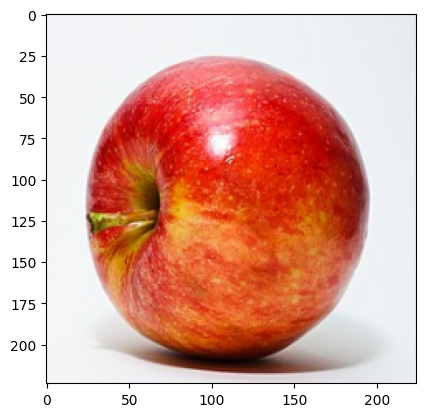

In [ ]:
RealtimePrediction("Red_Apple.jpg", model, Le)

Os resultados da previsão indicam que, ao submeter a imagem "Red_Apple.jpg" ao modelo treinado, a previsão foi concluída com sucesso em 4 segundos.

A classe resultante foi identificada como "apple".

O número "1/1" sugere que apenas uma imagem foi processada, e a label "apple" é a classe prevista para essa imagem específica.

Esta resposta é coerente com a expectativa de que o modelo, quando apresentado com uma imagem de uma maçã vermelha, conseguiu identificar corretamente a classe correspondente.